## Exploratory Data Analysis (EDA)

#### Task 1: Undertake the crucial task of conducting exploratory data analysis to understand the distribution of features(at least 3) and the target variable (bank data).

#### Task 2: Visualize the relationships between features(e.g., age, income, and loan amount) and the target variable using scatter plots, histograms, and box plots. This step is crucial in understanding the data distribution.

#### Task 3: Identify and thoroughly explain how you will handle outliers in the dataset. This is a critical step in ensuring the accuracy of your analysis.

### Expectations:

#### You must submit this assessment in a Jupyter Notebook format.
#### You must use comments and or markdowns to explain your thought process.
#### Your notebook must be self-explanatory and titled with your full name and email address.
#### This is a graded assignment and part of your continuous assessment.
#### You must submit this assessment on or before the 12th of July, 11:59 pm.
Submission link



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank_data = pd.read_csv('bank-full.csv', sep=';')

In [7]:
# bank_data.index = range(1, len(bank_data) + 1)

In [10]:
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [13]:
bank_data.shape # Checking for the dimension of the dataset

(45211, 17)

In [14]:
bank_data.columns # Checking to know all the columns in the dataset

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [16]:
bank_data.info() # checking to see the summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [17]:
bank_data.isna().sum() # checking to see if the is missing values in the datasets

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [18]:
bank_data.duplicated().sum()  # Checking datasets for duplicates row

0

In [19]:
bank_data.columns.duplicated() # Checking datasets for duplicates columns

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

### TASK 1

In [3]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [82]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


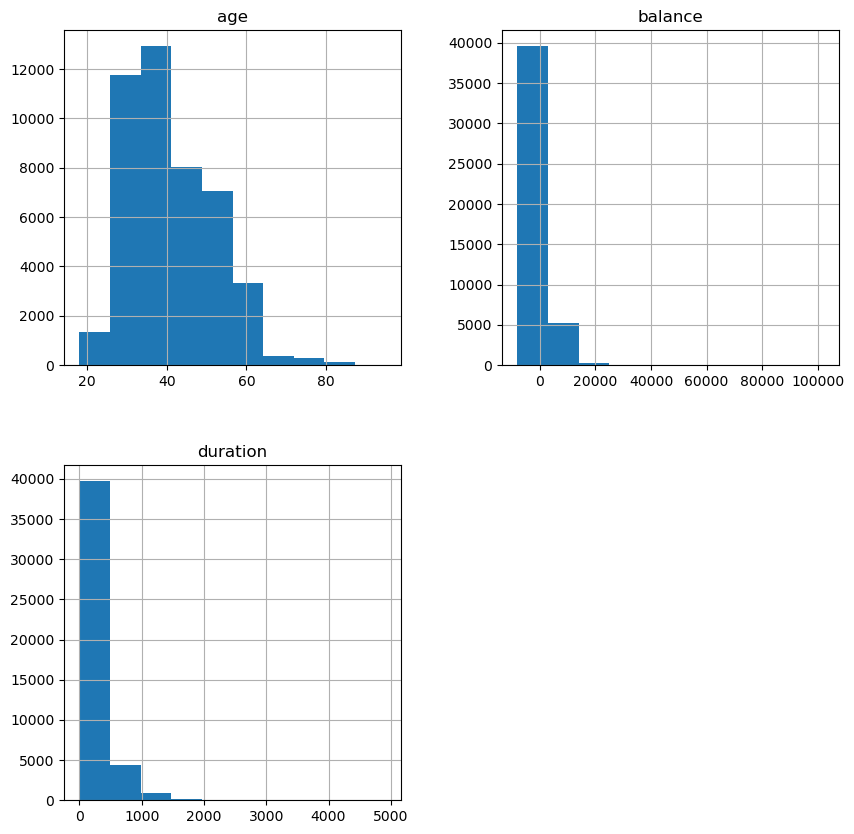

In [66]:
features = ['age', 'balance', 'duration'] 
bank_data[features].hist(figsize=(10,10));

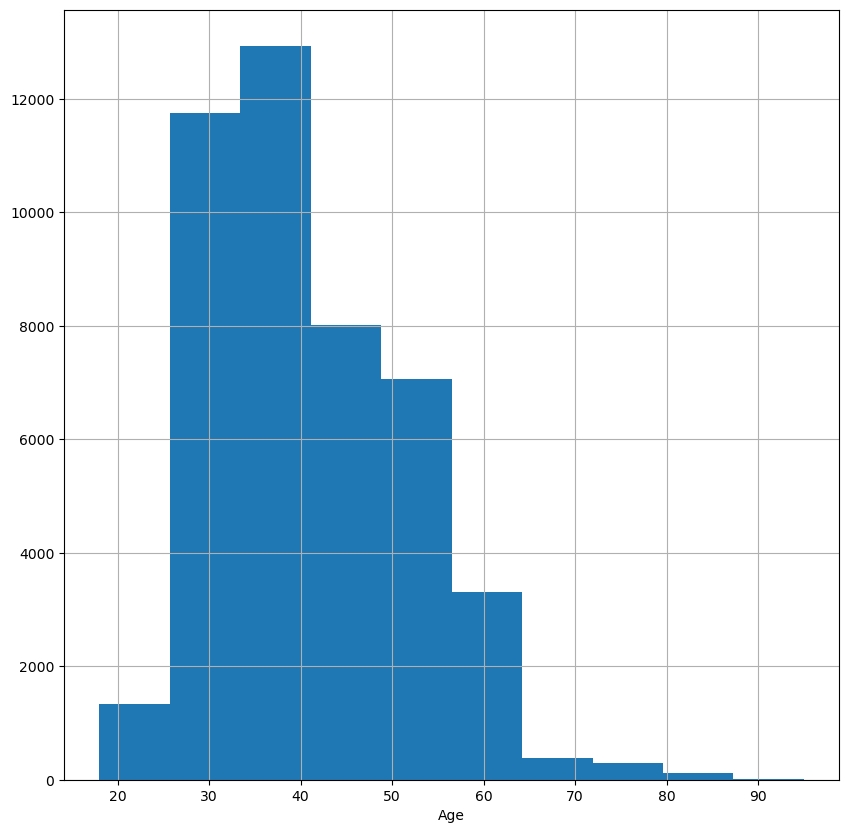

In [72]:
bank_data.age.hist(figsize=(10,10))
plt.xlabel('Age')
plt.show()

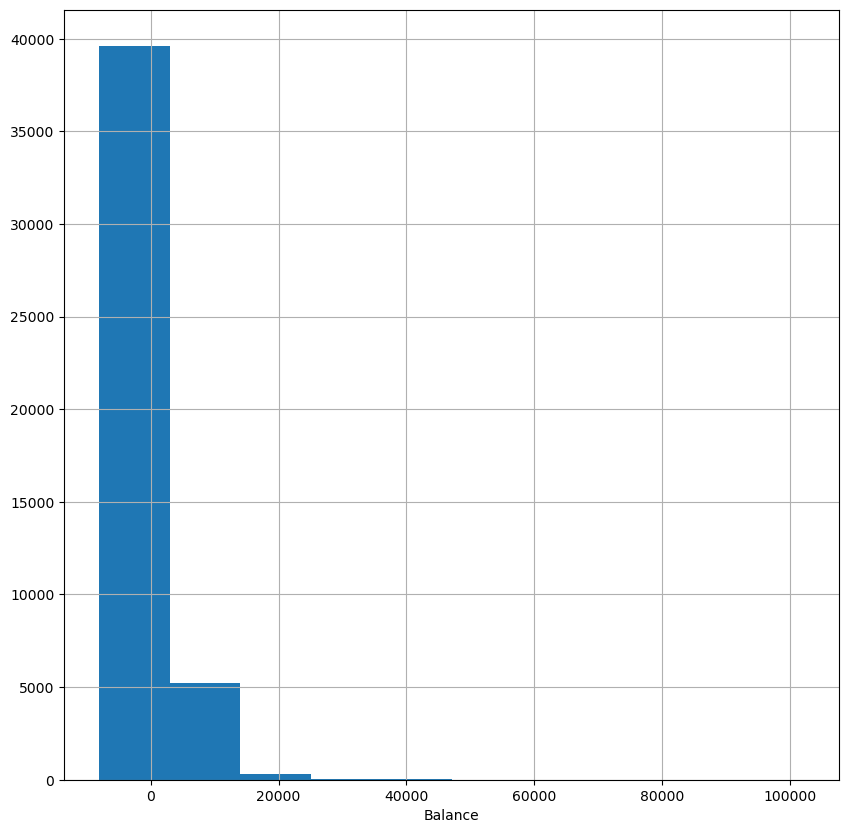

In [71]:
bank_data.balance.hist(figsize=(10,10))
plt.xlabel('Balance')
plt.show()

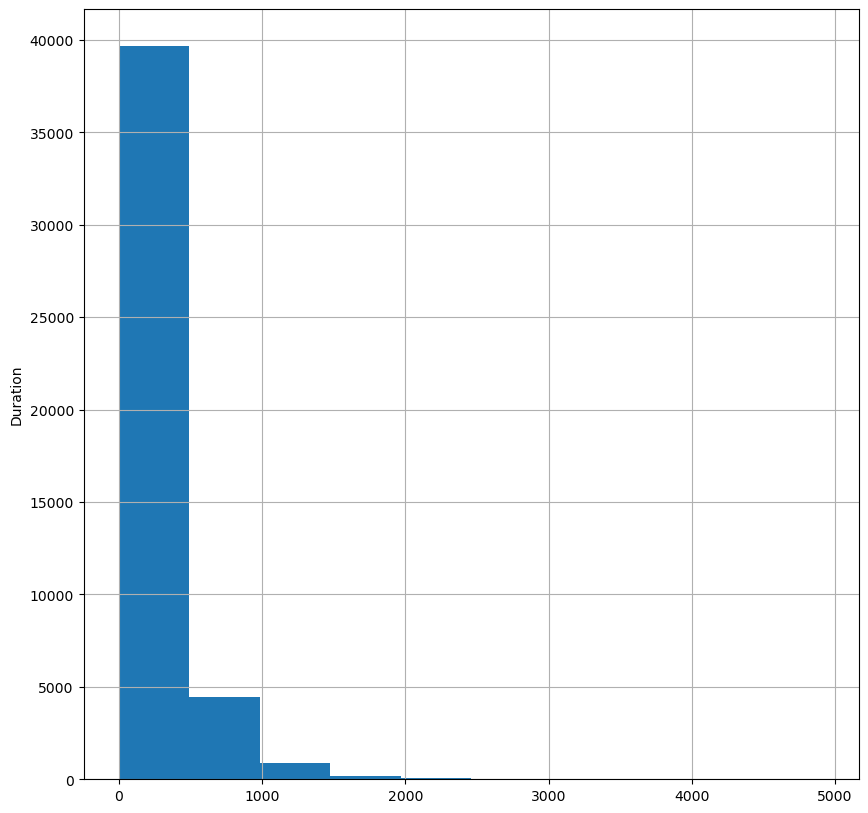

In [73]:
bank_data.duration.hist(figsize=(10,10))
plt.ylabel('Duration')
plt.show()

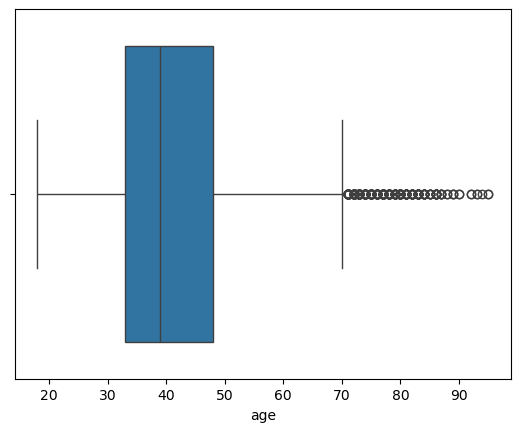

In [94]:
sns.boxplot(x='age', data=bank_data);

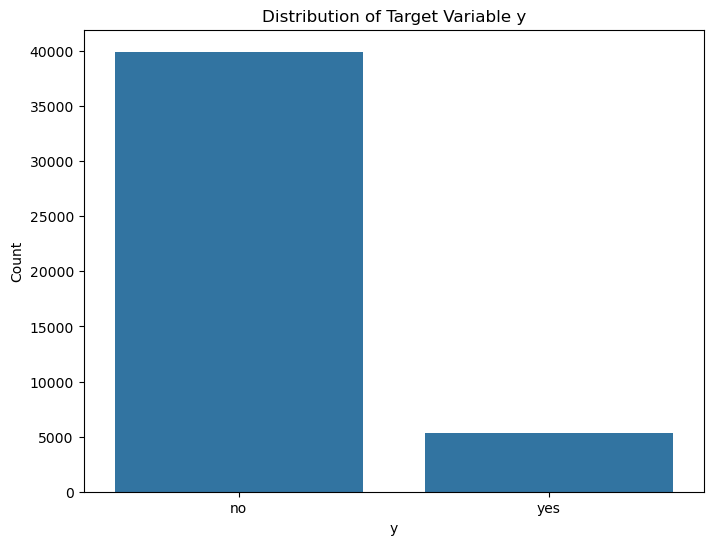

In [104]:
# Count plot for categorical target variable y
plt.figure(figsize=(8, 6))
sns.countplot(bank_data, x='y')
plt.title('Distribution of Target Variable y')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

In [99]:
bank_data.y.describe()

count     45211
unique        2
top          no
freq      39922
Name: y, dtype: object

In [ ]:
# Target variable

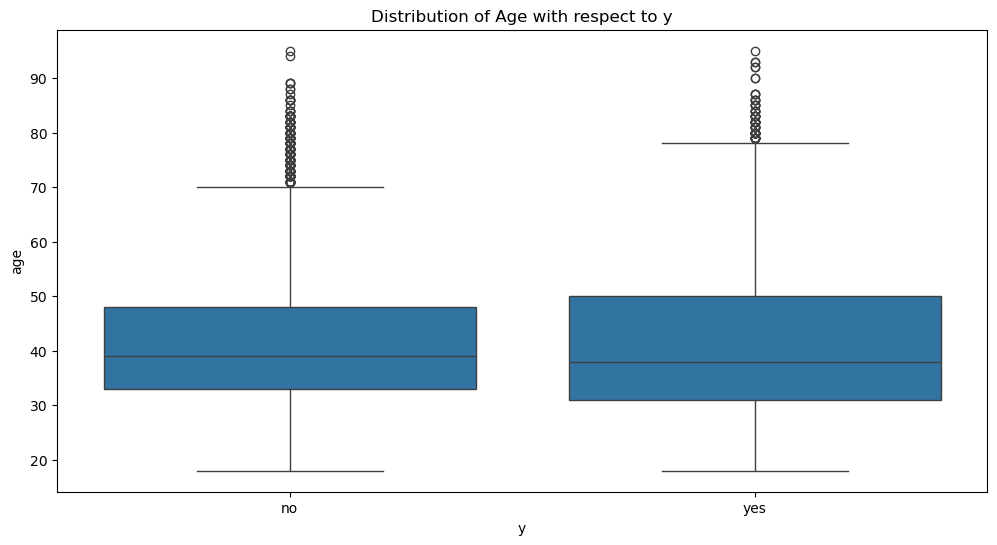

In [90]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='y', y='age', data=bank_data)
plt.title('Distribution of Age with respect to y')
plt.show()

In [85]:
bank_data.skew()

C:\Users\KLAUS\AppData\Local\Temp\ipykernel_14088\2713462718.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank_data.skew()


age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

### Age (0.684818): Moderately right-skewed.

##### The distribution of ages is slightly right-skewed, meaning there are some older ages that extend the right tail of the distribution.

### Balance (8.360308): Highly positive-skewed.

##### The distribution of account balances is highly right-skewed, indicating that while most balances are relatively low, there are a few very high balances extending the right tail significantly.

### Duration (3.144318): Highly positive-skewed.

#### The distribution of durations is highly right-skewed, meaning there are some very long durations extending the right tail.

In [80]:
bank_data.kurtosis()

C:\Users\KLAUS\AppData\Local\Temp\ipykernel_14088\427785678.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  bank_data.kurtosis()


age            0.319570
balance      140.751547
day           -1.059897
duration      18.153915
campaign      39.249651
pdays          6.935195
previous    4506.860660
dtype: float64

### Kurtosis is the measure of outliers present in the data.

#### High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3)

It shows that age and day have a kurtosis of less than 3 (<3). meaning the have no outliers. While Balance have a high kurtosis (140). this can be explain to the fact that different people have different earning power based on their Education and Job.

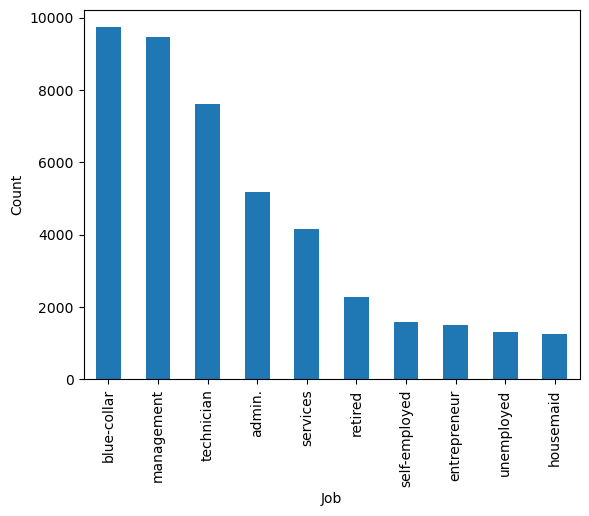

In [64]:
bank_data['job'].value_counts().head(10).plot.bar()
plt.xlabel('Job')
plt.ylabel('Count')


plt.show()

In [57]:
bank_data['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

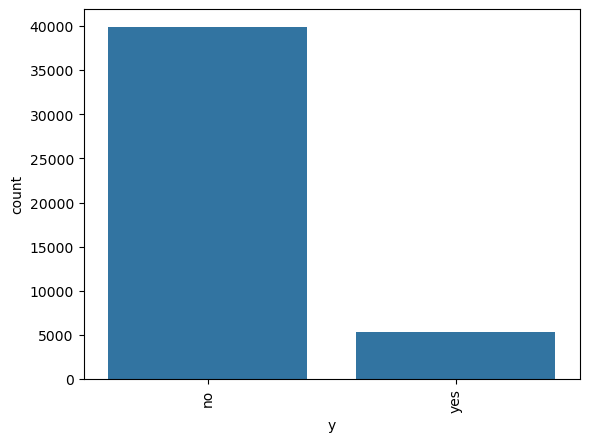

In [93]:
sns.countplot(bank_data, x="y");
plt.xticks(rotation=90)

plt.show()

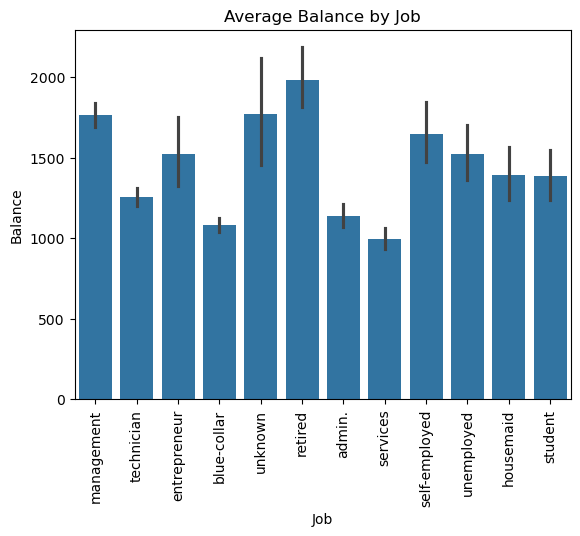

In [42]:
sns.barplot(bank_data, x='job', y='balance')
# Rotate the x-axis labels
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Average Balance by Job')
plt.xlabel('Job')
plt.ylabel('Balance')

# Display the plot
plt.show()

In [ ]:
Q1 = tit_df['Age'].quantile(.25)
Q3 = tit_df['Age'].quantile(.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [ ]:
#Distribution

sns.displot(data=tips_data, x= 'tip', bins =10, kde = False)

<Axes: xlabel='age', ylabel='balance'>

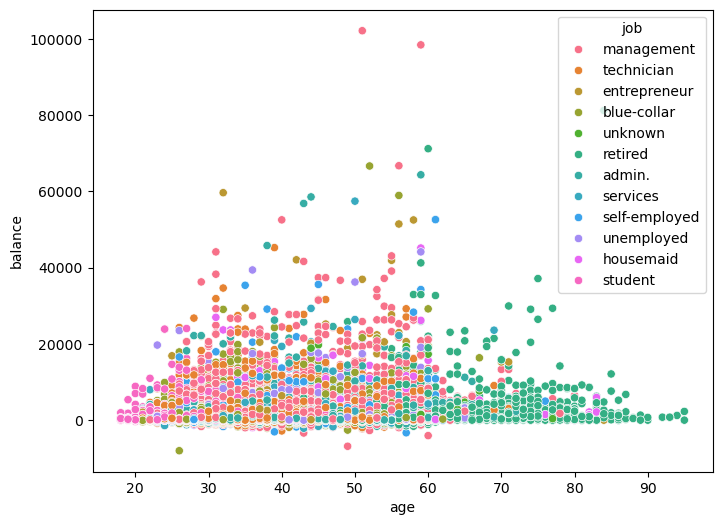

In [34]:
# Relationship between balance, age and jobs
plt.figure(figsize=(8,6))
sns.scatterplot(data=bank_data, x="age", y="balance", hue="job")

<Axes: xlabel='age', ylabel='balance'>

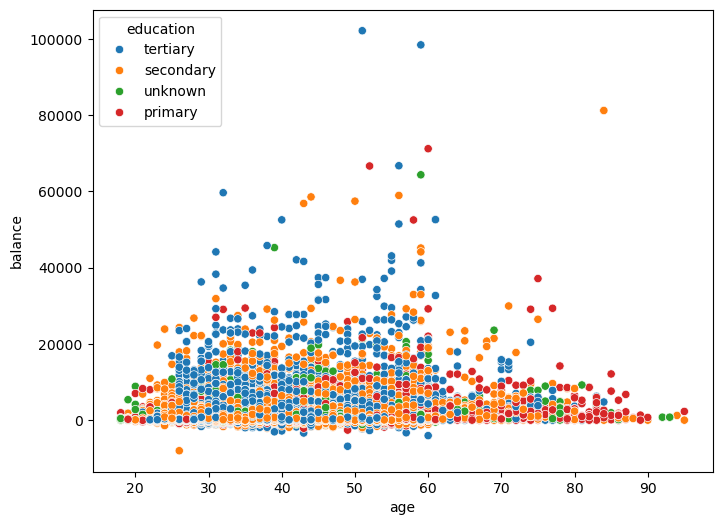

In [35]:
# Relationship between balance, age and jobs
plt.figure(figsize=(8,6))
sns.scatterplot(data=bank_data, x="age", y="balance", hue="education")

<Axes: xlabel='age', ylabel='balance'>

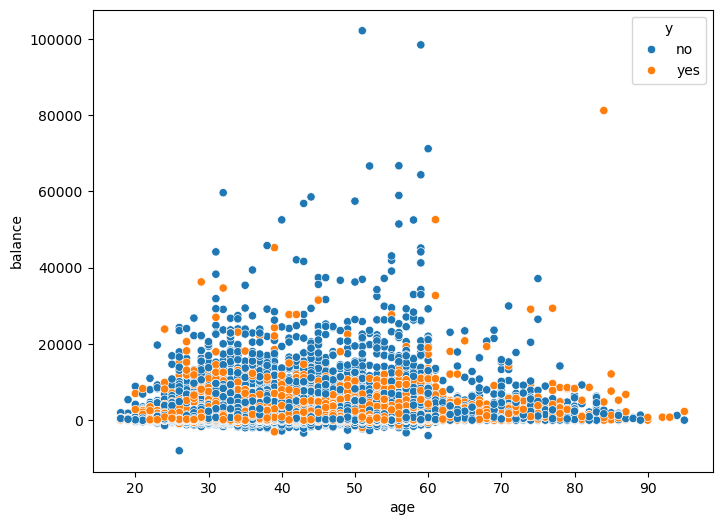

In [41]:
# Relationship between balance, age and loan
plt.figure(figsize=(8,6))
sns.scatterplot(data=bank_data, x="age", y="balance", hue="y")

In [ ]:
# I want to know the relationship btw age, balance, and if they took loan
# I want to know the relationship btw education, job, and loan
# I want to know the relationship btw job, housing, and loan
# I want to know the relationship btw job, balance, and loan

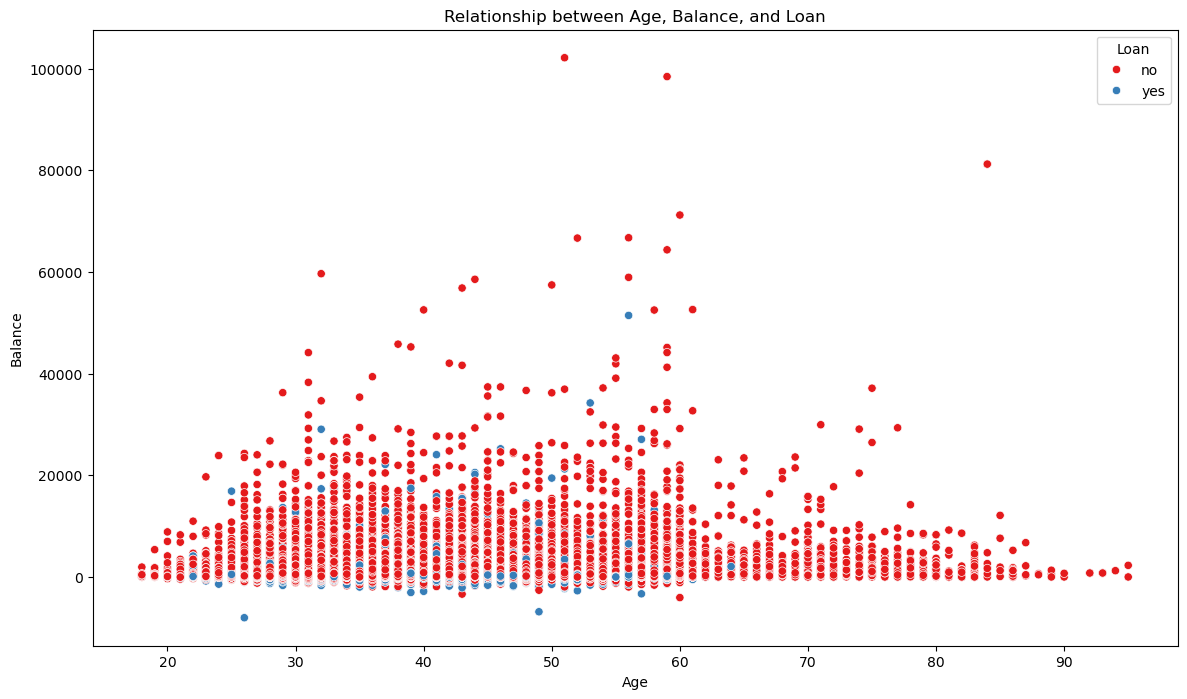

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relationship between Age, Balance, and Loan
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data, x='age', y='balance', hue='loan', palette='Set1')
plt.title('Relationship between Age, Balance, and Loan')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend(title='Loan', loc='upper right')
plt.show()


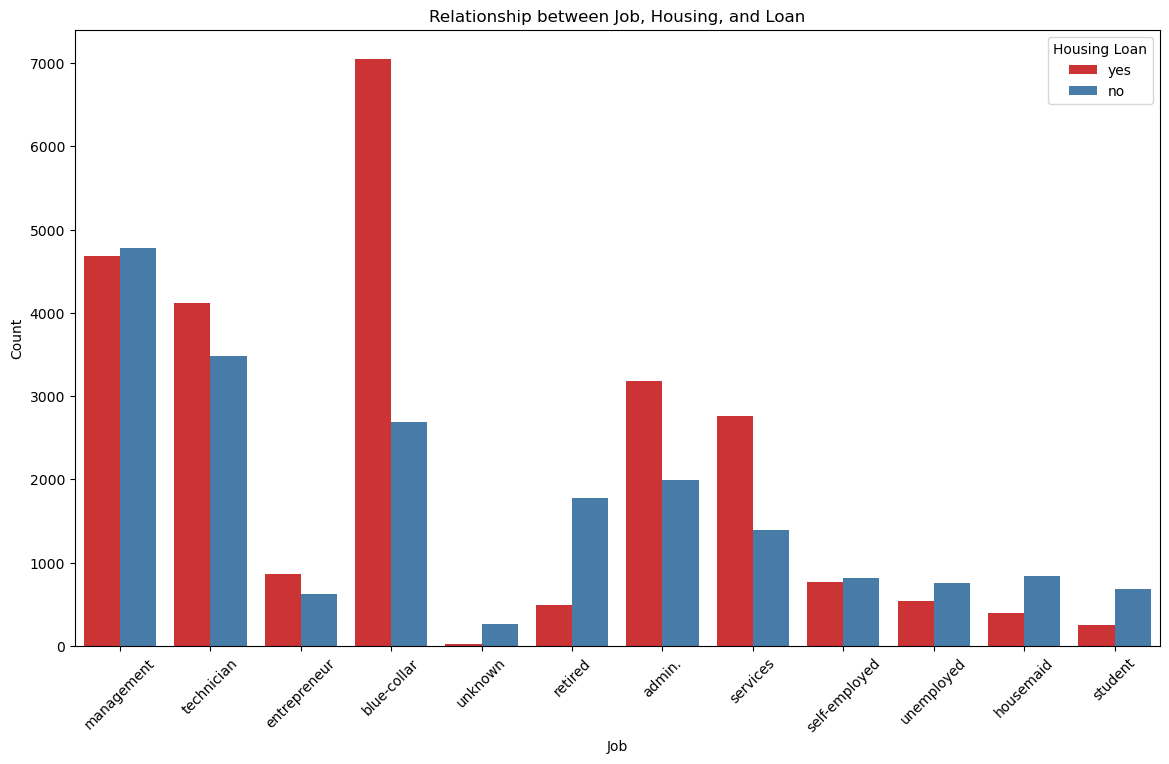

<Figure size 1400x800 with 0 Axes>

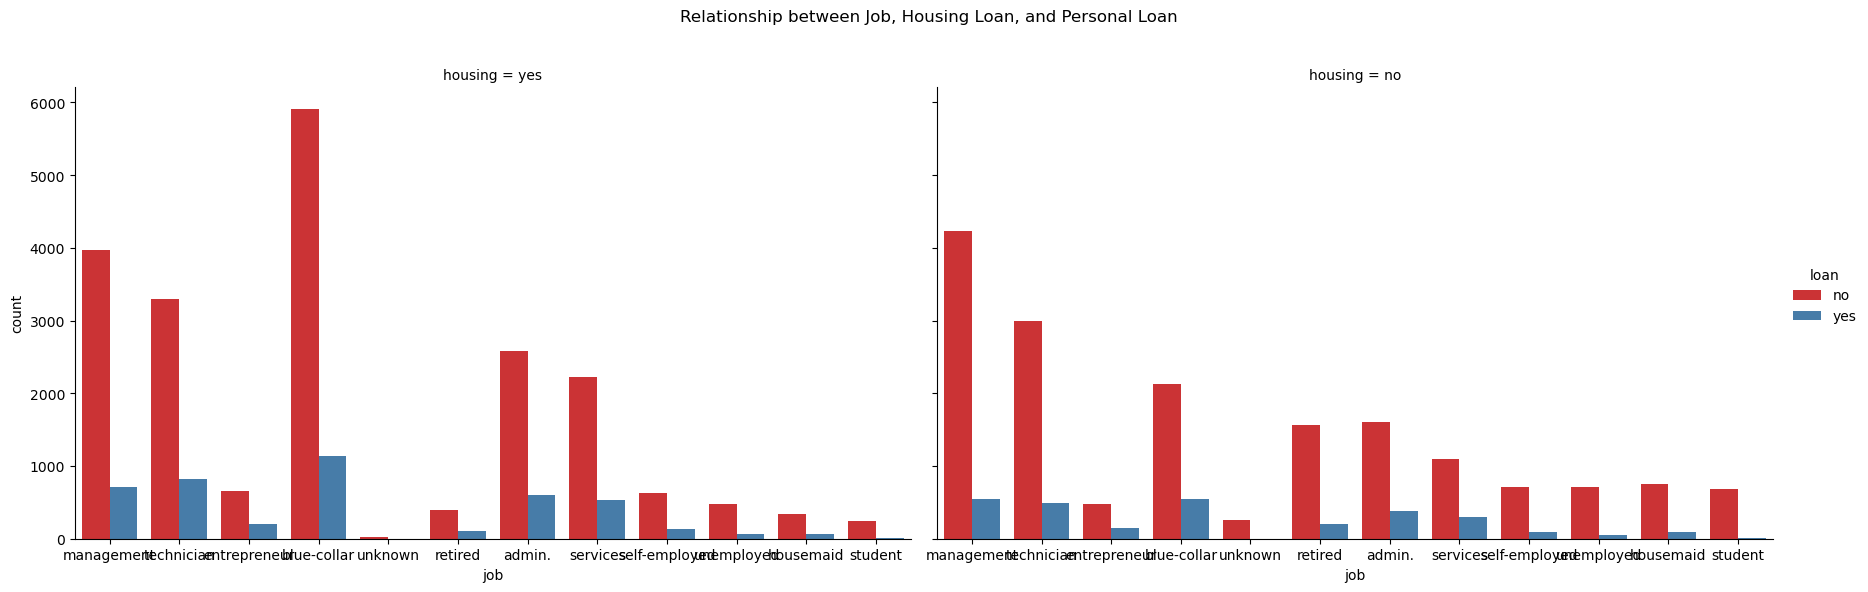

In [52]:
# Relationship between Job, Housing, and Loan
plt.figure(figsize=(14, 8))
sns.countplot(data=data, x='job', hue='housing', palette='Set1')
plt.title('Relationship between Job, Housing, and Loan')
plt.xlabel('Job')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Housing Loan', loc='upper right')
plt.show()

# Let's also look at the relationship between Job and Loan in another way
plt.figure(figsize=(14, 8))
sns.catplot(data=data, x='job', hue='loan', col='housing', kind='count', palette='Set1', height=6, aspect=1.5)
plt.subplots_adjust(top=0.85)
plt.suptitle('Relationship between Job, Housing Loan, and Personal Loan')
plt.show()
